In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\Retheck\Downloads\archive\Mall_Customers.csv")


In [4]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
data = data.dropna()  
features = data.select_dtypes(include=[np.number])

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(scaled_features)
    

C:\Users\Retheck\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [8]:
data['Cluster'] = kmeans.labels_

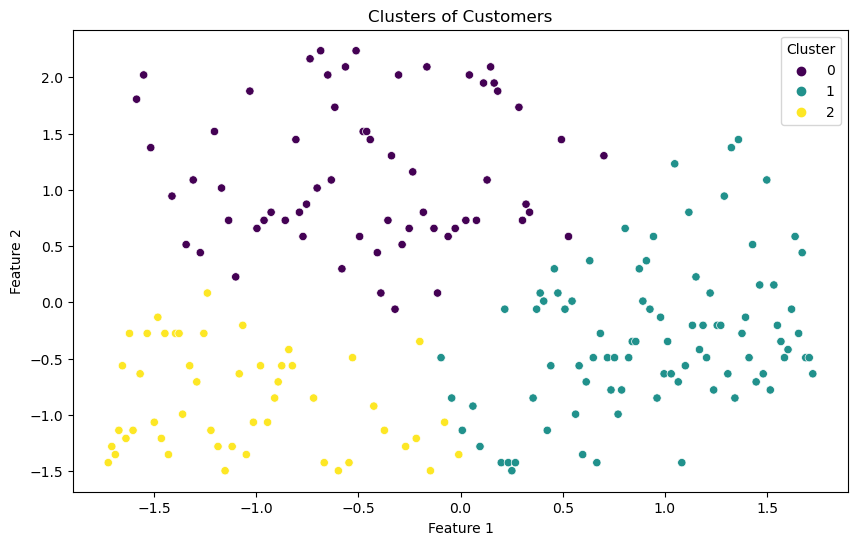

Cluster Centers:
 [[-0.47192101  1.13852727 -0.42245682 -0.37379617]
 [ 0.94955398 -0.31837188  0.88854921  0.06363166]
 [-1.05760344 -0.88057728 -1.01378004  0.36026408]]


In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1], 
    hue=data['Cluster'], palette='viridis'
)
plt.title('Clusters of Customers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


print("Cluster Centers:\n", kmeans.cluster_centers_)


data.to_csv('segmented_customers.csv', index=False)